## Auto-sklearn Demonstration (Classification)
Heart Failure - https://www.kaggle.com/code/tanmay111999/approach-for-binary-classification-heart-failure

In [1]:
from pprint import pprint

import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import pandas as pd

# To install autosklearn: pip install pyrfr==0.6.1, then pip install auto-sklearn
import autosklearn.classification
from autosklearn.metrics import (accuracy, f1, roc_auc, precision,
                                average_precision, recall, log_loss)

from multi_train import MultiTrain
import matplotlib.pyplot as plt
# import autosklearn

### Data Loading

In [2]:
multi = MultiTrain()

In [3]:
multi.X_train = pd.read_csv("./data/heart/X_train.csv",index_col=[0])
multi.y_train = pd.read_csv("./data/heart/y_train.csv",index_col=[0])
multi.X_test = pd.read_csv("./data/heart/X_test.csv",index_col=[0])
multi.y_test = pd.read_csv("./data/heart/y_test.csv",index_col=[0])

In [4]:
print("X_train:", multi.X_train.shape, "y_train:", multi.y_train.shape)
print("X_test:", multi.X_test.shape, "y_test:", multi.y_test.shape)
multi.X_train.head()

X_train: (734, 20) y_train: (734, 1)
X_test: (184, 20) y_test: (184, 1)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
795,42,120,240,1,194,0.8,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,36,130,209,0,178,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,37,130,211,0,142,0.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,51,120,0,1,104,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0


### Build and fit a classifier
* **“n_jobs”** - number of cores in the system. (use -1 for as many cores as available).
* **“time_left_for_this_task”** argument for the number of seconds for the process to run.
<br>&emsp;&emsp;("less than 5-10 minutes is probably plenty for many small predictive modeling tasks (sub 1,000 rows).")
* **“per_run_time_limit”** - limit the time allocated to each model evaluation (in seconds).
* **"ensemble_size"** - number of models to include in the ensemble.
* **"metric"** - the metric which we want to optimize

In [8]:
%%time
initial_configurations_via_metalearning = [0, 2, 4, 8, 16, 32]
resampling_strategies = ['holdout', 'holdout-iterative-fit', 'cv', 'cv-iterative-fit']
max_models_on_disc = [2, 4, 8, 16, 32, 64]
ensemble_sizes = [1, 2, 3, 4, 8, 16]

# initial_configurations_via_metalearning = []
# resampling_strategies = []
# max_models_on_disc = []
# ensemble_sizes = []

multi.build_and_fit_classifier(dataset_name="Heart",
                               initial_configurations_via_metalearning=initial_configurations_via_metalearning,
                               resampling_strategies=resampling_strategies,
                               max_models_on_disc=max_models_on_disc,
                               ensemble_sizes=ensemble_sizes)

-> Fitting - Resampling Strategy: cv


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33325 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Heart/autosklearn/autosklearn_Heart_resamp-strategy_cv.pkl'
-> Fitting - Resampling Strategy: cv-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33823 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Heart/autosklearn/autosklearn_Heart_resamp-strategy_cv-iterative-fit.pkl'
-> Fitting - Resampling Strategy: cv-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39361 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Heart/autosklearn/autosklearn_Heart_resamp-strategy_cv-iterative-fit.pkl'
CPU times: user 25min 5s, sys: 5min 19s, total: 30min 24s
Wall time: 16min 21s


## Testing effects of different parameter changes 

## Visualize 

In [46]:
collected_data = pd.read_csv('./models/Heart/autosklearn/logs/old_log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Initial_Confs,0,183.947094,0.881471,0.858696
1,Initial_Confs,2,204.139403,0.985014,0.880435
2,Initial_Confs,4,176.947101,1.000000,0.847826
3,Initial_Confs,8,203.504167,0.919619,0.858696
4,Initial_Confs,16,216.626554,0.980926,0.875000
5,Initial_Confs,32,395.991803,1.000000,0.875000
6,Max_Models,2,182.072566,0.990463,0.880435
7,Max_Models,4,187.575360,0.986376,0.891304
8,Max_Models,8,185.160570,0.972752,0.891304
9,Max_Models,16,230.089355,0.948229,0.864130


In [47]:
initial_confs_df = collected_data[collected_data['Feature'] == 'Initial_Confs']
max_models_df = collected_data[collected_data['Feature'] == 'Max_Models']
ensemble_size_df = collected_data[collected_data['Feature'] == 'Ensemble_Size']
resamp_strategy_df = collected_data[collected_data['Feature'] == 'Resampling_Strategy']

### Initial Configurations Effects

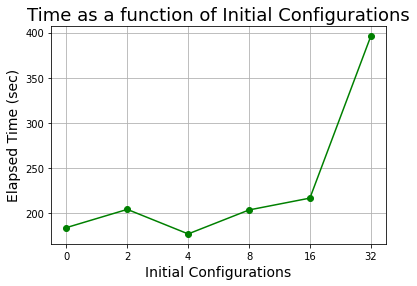

In [48]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

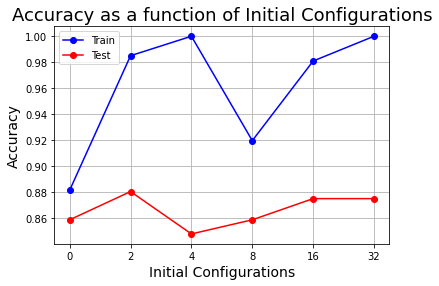

In [49]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(initial_confs_df['Value'], initial_confs_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Max Models Effects

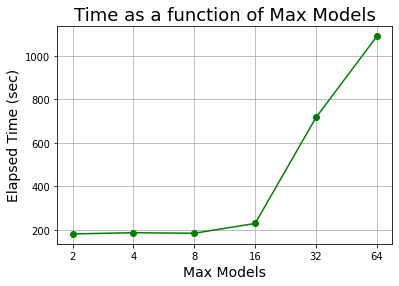

In [50]:
plt.plot(max_models_df['Value'], max_models_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

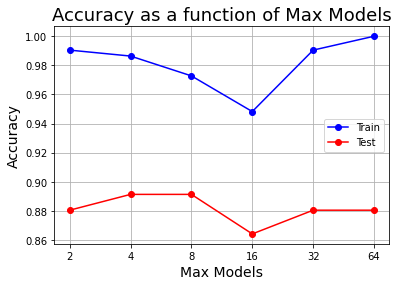

In [51]:
plt.plot(max_models_df['Value'], max_models_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(max_models_df['Value'], max_models_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Ensemble Size Effects

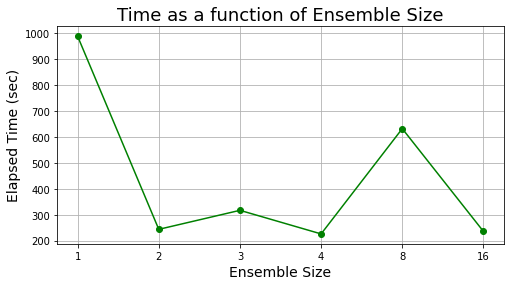

In [52]:
plt.figure(figsize=(8,4))

plt.plot(ensemble_size_df['Value'], ensemble_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

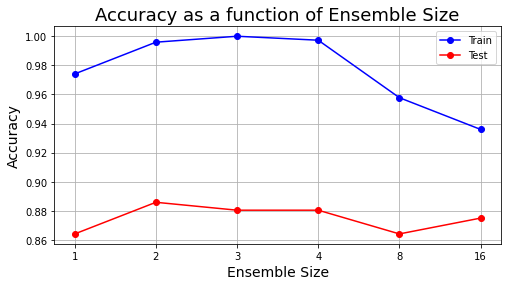

In [53]:
plt.figure(figsize=(8,4))
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Remsampling Strategy Effects

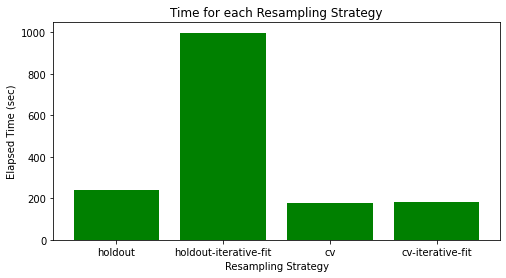

In [54]:
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(resamp_strategy_df['Value'], resamp_strategy_df['Elapsed_Time'], color ='green')

plt.xlabel("Resampling Strategy")
plt.ylabel("Elapsed Time (sec)")
plt.title("Time for each Resampling Strategy")
plt.show()

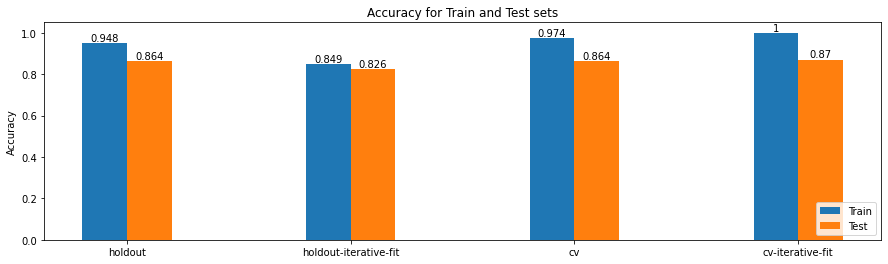

In [55]:
import numpy as np

labels = resamp_strategy_df['Value']
train_score = np.array(resamp_strategy_df['Train_Score']).round(3)
test_score = np.array(resamp_strategy_df['Test_Score']).round(3)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width/2, train_score, width, label='Train')
rects2 = ax.bar(x + width/2, test_score, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Train and Test sets')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)

plt.show()